<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220522.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as gg
from plotnine import ggplot, aes 
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import sklearn.datasets as skd

# regression

In [4]:
os.chdir('../content')

In [6]:
list_file = pd.DataFrame(os.listdir(), columns = ['file'])

def cnt_len(a) :
  temp = pd.read_csv(a)
  return len(temp)

In [13]:
list_file = list_file[list_file['file'].str.contains('.+csv$')]

In [14]:
list_file = list_file.assign(n_row = list(map(cnt_len, list_file['file'])))
list_file.head()

,file,n_row
1,openintro_birds.csv,19302
2,wooldridge_alcohol.csv,9822
3,gt_pizzaplace.csv,49574
4,openintro_avandia.csv,227572
5,wooldridge_mathpnl.csv,3850


In [19]:
list_file = list_file.sort_values('n_row', ascending = False)
list_file.head(10)

,file,n_row
4,openintro_avandia.csv,227572
20,openintro_mammogram.csv,89836
21,itsadug_simdat.csv,75600
26,lme4_InstEval.csv,73421
6,stevedata_gss_abortion.csv,64814
28,AER_CPSSW8.csv,61395
17,ggplot2_diamonds.csv,53940
27,openintro_seattlepets.csv,52519
3,gt_pizzaplace.csv,49574
9,causaldata_scorecard.csv,48445


In [40]:
d1 = pd.read_csv(list_file.iloc[15,0])
d1.head()

,V1,kids,morekids,boys2,girls2,boy1st,boy2nd,samesex,multi2nd,age,...,black,hispan,worked,weeks,hours,labinc,faminc,nonmomi,educ,agesq
0,1,2,0,0,0,1,0,0,0,35,...,1,0,0,0,0,0.00000,44.450001,44.450001,14,1225
1,2,3,1,0,0,0,1,0,0,32,...,1,0,1,40,40,14.70470,38.047501,23.342800,12,1024
2,3,2,0,1,0,1,1,1,0,30,...,1,0,1,52,35,20.16255,20.592890,0.430330,12,900
3,4,2,0,0,0,1,0,0,0,33,...,1,0,1,50,40,21.00222,83.987885,62.985691,14,1089
4,5,2,0,0,1,0,0,1,0,31,...,1,0,1,26,48,21.86289,88.826500,66.963631,12,961


In [41]:
d1.columns = [a.lower() for a in d1.columns]
d1.head()

,v1,kids,morekids,boys2,girls2,boy1st,boy2nd,samesex,multi2nd,age,...,black,hispan,worked,weeks,hours,labinc,faminc,nonmomi,educ,agesq
0,1,2,0,0,0,1,0,0,0,35,...,1,0,0,0,0,0.00000,44.450001,44.450001,14,1225
1,2,3,1,0,0,0,1,0,0,32,...,1,0,1,40,40,14.70470,38.047501,23.342800,12,1024
2,3,2,0,1,0,1,1,1,0,30,...,1,0,1,52,35,20.16255,20.592890,0.430330,12,900
3,4,2,0,0,0,1,0,0,0,33,...,1,0,1,50,40,21.00222,83.987885,62.985691,14,1089
4,5,2,0,0,1,0,0,1,0,31,...,1,0,1,26,48,21.86289,88.826500,66.963631,12,961


In [42]:
d1 = d1.drop(['v1', 'kids'], axis = 1)

In [49]:
t1 = d1.assign(x = 1)
t1 = pd.melt(t1, id_vars = 'x')
t1.head()

,x,variable,value
0,1,morekids,0.0
1,1,morekids,1.0
2,1,morekids,0.0
3,1,morekids,0.0
4,1,morekids,0.0


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/statsmodels/sandbox/nonparametric/kernels.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  w = 1. / (h * n) * np.sum(self((xs-x)/h), axis=0)
/usr/local/lib/python3.7/dist-packages/statsmodels/sandbox/nonparametric/kernels.py:204: RuntimeWarning: divide by zero encountered in true_divide
  w = 1. / (h * n) * np.sum(self((xs-x)/h), axis=0)
/usr/local/lib/python3.7/dist-packages/statsmodels/sandbox/nonparametric/kernels.py:204: RuntimeWarning: invalid value encountered in true_divide
  w = 1. / (h * n) * np.sum(self((xs-x)/h), axis=0)
/usr/local/lib/python3.7/dist-packages/statsmodels/sandbox/nonparametric/kernels.py:204: RuntimeWarning: invalid value encountered in multiply
  w = 1. / (h * n) * np.sum(self((xs-x)/h)

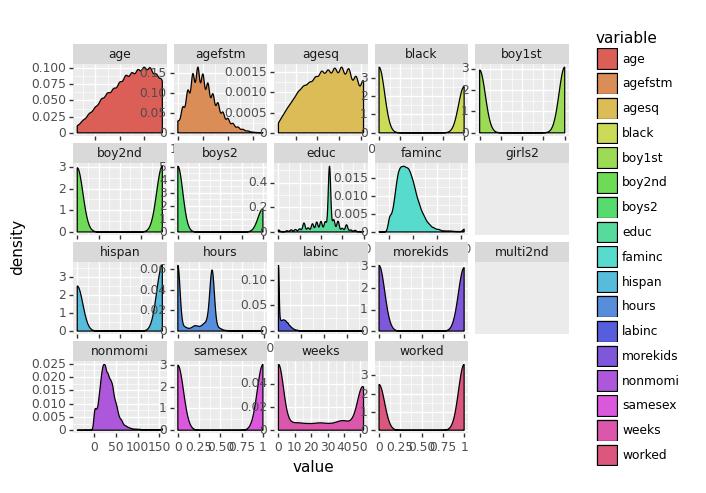

<ggplot: (8755580951957)>

In [50]:
(
    ggplot(t1, aes('value', fill = 'variable')) +
    gg.geom_density() +
    gg.facet_wrap('~variable', scales = 'free')
)

In [51]:
d1.describe()

,morekids,boys2,girls2,boy1st,boy2nd,samesex,multi2nd,age,agefstm,black,hispan,worked,weeks,hours,labinc,faminc,nonmomi,educ,agesq
count,31857.000000,31857.000000,31857.000000,31857.000000,31857.000000,31857.000000,31857.000000,31857.000000,31857.000000,31857.000000,31857.000000,31857.000000,31857.000000,31857.000000,31857.000000,31857.000000,31857.000000,31857.000000,31857.000000
mean,0.491007,0.259943,0.242835,0.511285,0.505823,0.502778,0.008664,29.741752,20.117745,0.412970,0.593182,0.589792,22.673541,21.220109,8.531143,40.180012,31.761798,11.005336,897.630568
std,0.499927,0.438610,0.428803,0.499880,0.499974,0.500000,0.092676,3.613745,2.888592,0.492375,0.491248,0.491879,22.601463,19.498915,11.434808,23.831305,20.412412,3.305196,210.159238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-20.981230,-39.936749,0.000000,441.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.321810,18.903051,9.000000,729.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,30.000000,20.000000,0.000000,1.000000,1.000000,16.000000,25.000000,3.159260,37.438751,29.398920,12.000000,900.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,33.000000,22.000000,1.000000,1.000000,1.000000,50.000000,40.000000,14.704700,52.500309,41.993942,12.000000,1089.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,32.000000,1.000000,1.000000,1.000000,52.000000,99.000000,185.787247,157.438004,157.438004,20.000000,1225.000000


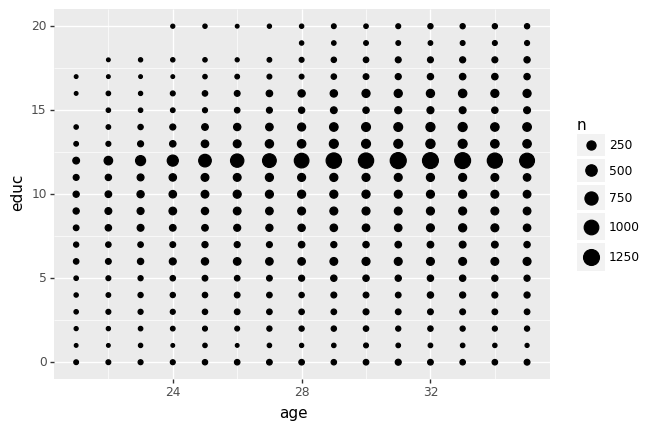

<ggplot: (8755575685717)>

In [55]:
(
    ggplot(d1, aes('age','educ')) +
    gg.geom_count()
)

In [71]:
d1[['black', 'boy1st', 'samesex', 'worked', 'boy2nd', 'boys2', 'hispan', 'morekids']].value_counts().head()

black  boy1st  samesex  worked  boy2nd  boys2  hispan  morekids
0      1       1        0       1       1      1       1           1506
1      1       0        1       0       0      0       0           1463
       0       0        1       1       0      0       0           1385
0      0       0        1       1       0      1       0           1366
               1        0       0       0      1       1           1351
dtype: int64

In [74]:
d1[['girls2', 'multi2nd']].value_counts()

girls2  multi2nd
0       0           23909
1       0            7672
0       1             212
1       1              64
dtype: int64

In [76]:
d2 = pd.get_dummies(d1, columns = ['black', 'boy1st', 'samesex', 'worked', 'boy2nd', 'boys2', 'hispan', 'morekids', 'girls2', 'multi2nd'])
d2.head()

,age,agefstm,weeks,hours,labinc,faminc,nonmomi,educ,agesq,black_0,...,boys2_0,boys2_1,hispan_0,hispan_1,morekids_0,morekids_1,girls2_0,girls2_1,multi2nd_0,multi2nd_1
0,35,27,0,0,0.00000,44.450001,44.450001,14,1225,0,...,1,0,1,0,1,0,1,0,1,0
1,32,20,40,40,14.70470,38.047501,23.342800,12,1024,0,...,1,0,1,0,0,1,1,0,1,0
2,30,19,52,35,20.16255,20.592890,0.430330,12,900,0,...,0,1,1,0,1,0,1,0,1,0
3,33,23,50,40,21.00222,83.987885,62.985691,14,1089,0,...,1,0,1,0,1,0,1,0,1,0
4,31,26,26,48,21.86289,88.826500,66.963631,12,961,0,...,1,0,1,0,1,0,0,1,1,0


In [78]:
x = d2[['agefstm', 'weeks', 'hours', 'labinc', 'faminc', 'nonmomi',
       'educ', 'agesq', 'black_0', 'black_1', 'boy1st_0', 'boy1st_1',
       'samesex_0', 'samesex_1', 'worked_0', 'worked_1', 'boy2nd_0',
       'boy2nd_1', 'boys2_0', 'boys2_1', 'hispan_0', 'hispan_1', 'morekids_0',
       'morekids_1', 'girls2_0', 'girls2_1', 'multi2nd_0', 'multi2nd_1']]
y = d2['age']

In [79]:
x_tr, x_te, y_tr,  y_te = train_test_split(x, y, train_size = .7)

In [80]:
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)

In [81]:
pred_rf = fit_rf.predict(x_te)

(array([ 953.,  938., 2882., 1931., 2126., 5224., 2889., 6222., 3164.,
        5528.]),
 array([21. , 22.4, 23.8, 25.2, 26.6, 28. , 29.4, 30.8, 32.2, 33.6, 35. ]),
 <a list of 10 Patch objects>)

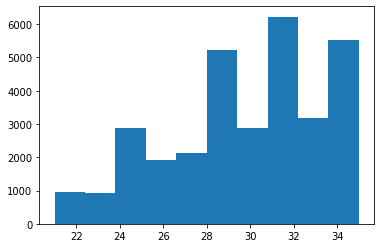

In [82]:
plt.hist(d1['age'])

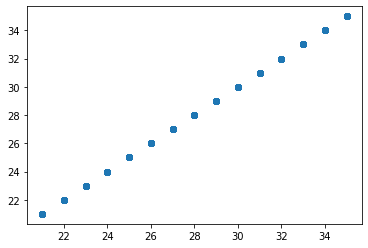

In [83]:
plt.plot(y_te, pred_rf, 'o')

In [85]:
fit_rf.score(x_tr, y_tr), fit_rf.score(x_te, y_te)

(1.0, 1.0)